**EDA**

**Models**

Stas
* Moving Average
* ARIMA
* ETS

---


* Theta
* Croston
* SARIMA

---

* N-Hits
* N-Beats
* TFT
* GAM
* Prophet
* Dart
* linear trees
* DeepAR+
* ML models
* More Transformer
* More models to provide accuracy and explainability like prophet
---


**Evaluation**


* accuracy
* interpretability
* runtimes
* Bias


In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 16.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

df = pd.read_csv("/content/drive/MyDrive/folder/Electric_Production.csv")

df

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151
...,...,...
392,9/1/2017,98.6154
393,10/1/2017,93.6137
394,11/1/2017,97.3359
395,12/1/2017,114.7212


In [ ]:
df.describe()

,IPG2211A2N
count,397.000000
mean,88.847218
std,15.387834
min,55.315100
25%,77.105200
50%,89.779500
75%,100.524400
max,129.404800


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        397 non-null    object 
 1   IPG2211A2N  397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [ ]:
df['DATE'] = pd.to_datetime(df['DATE'])
df

,DATE,IPG2211A2N
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151
...,...,...
392,2017-09-01,98.6154
393,2017-10-01,93.6137
394,2017-11-01,97.3359
395,2017-12-01,114.7212


In [ ]:
df['DATE'] = pd.to_datetime(df['DATE'])
time_diff = df['DATE'].diff()
expected_interval = pd.Timedelta(hours=1)
gaps = time_diff[time_diff > expected_interval]
if not gaps.empty:
    print("Gaps detected in the time series data.")
    print(gaps)
else:
    print("No gaps detected in the time series data.")

Gaps detected in the time series data.
1     31 days
2     28 days
3     31 days
4     30 days
5     31 days
        ...  
392   31 days
393   30 days
394   31 days
395   30 days
396   31 days
Name: DATE, Length: 396, dtype: timedelta64[ns]


In [ ]:
# Set 'Datetime' as the index
df.set_index('DATE', inplace=True)

# Generate a date range from the first date to the last date with hourly frequency
date_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D')

# Reindex the DataFrame with the complete date range
df = df.reindex(date_range)
df

,IPG2211A2N
1985-01-01,72.5052
1985-01-02,NaN
1985-01-03,NaN
1985-01-04,NaN
1985-01-05,NaN
...,...
2017-12-28,NaN
2017-12-29,NaN
2017-12-30,NaN
2017-12-31,NaN


In [ ]:
# Use forward fill (LOCF) to fill missing values
df['IPG2211A2N'].fillna(method='ffill', inplace=True)

# Reset the index to have 'Datetime' as a regular column
df.reset_index(inplace=True)
df

,index,IPG2211A2N
0,1985-01-01,72.5052
1,1985-01-02,72.5052
2,1985-01-03,72.5052
3,1985-01-04,72.5052
4,1985-01-05,72.5052
...,...,...
12049,2017-12-28,114.7212
12050,2017-12-29,114.7212
12051,2017-12-30,114.7212
12052,2017-12-31,114.7212


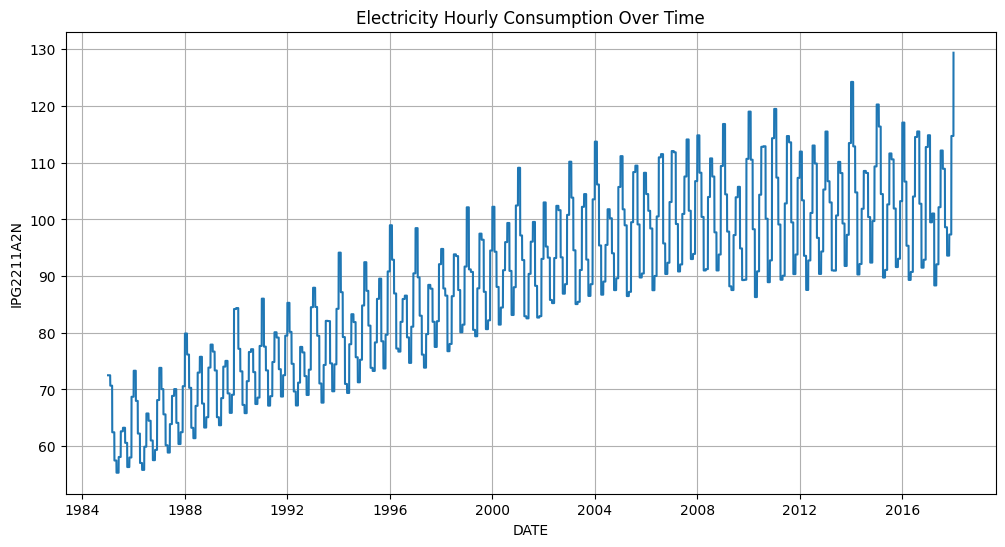

In [ ]:
plt.figure(figsize=(12, 6))
# plt.plot(df['Datetime'], df['target'])
plt.plot(df['index'], df['IPG2211A2N'])
plt.title('Electricity Hourly Consumption Over Time')
plt.xlabel('DATE')
plt.ylabel('IPG2211A2N')
plt.grid(True)
plt.show()

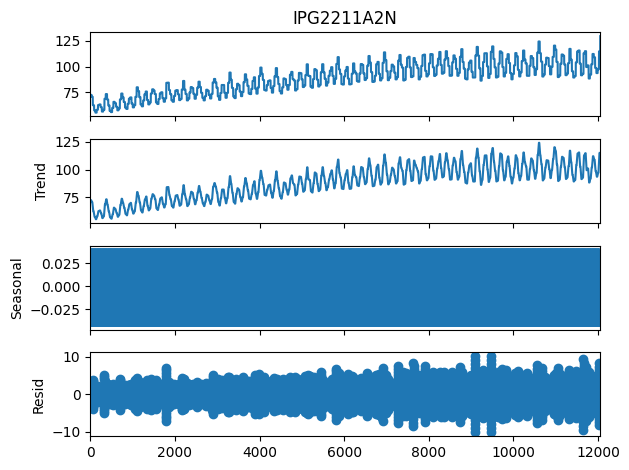

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df["IPG2211A2N"], model='additive', period =20)
figure = decomposition.plot()
plt.show()

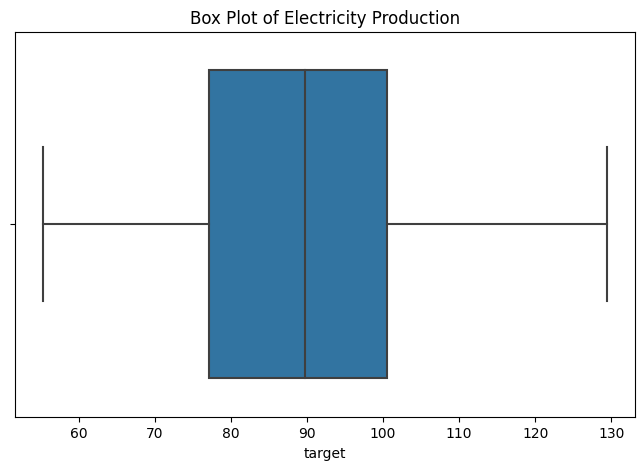

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['IPG2211A2N'])
plt.title('Box Plot of Electricity Production')
plt.xlabel('target')
plt.show()

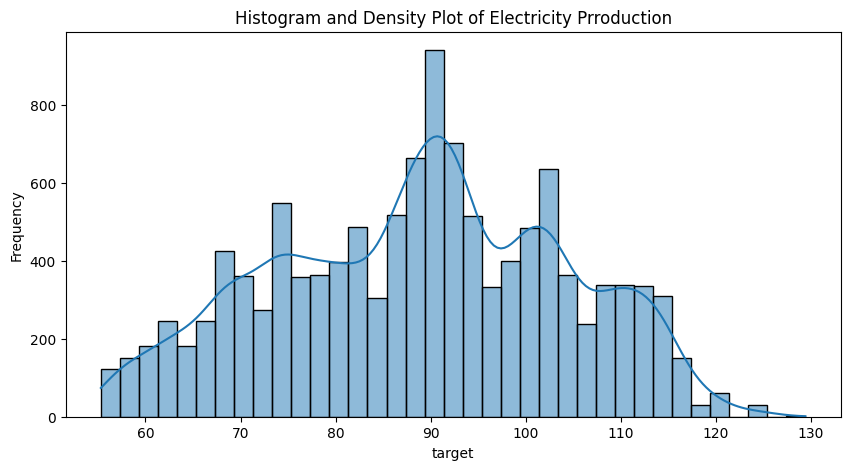

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['IPG2211A2N'], kde=True)
plt.title('Histogram and Density Plot of Electricity Prroduction')
plt.xlabel('target')
plt.ylabel('Frequency')
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
passing_data=adfuller(df['IPG2211A2N'])

def adf_test(sales):
    result=adfuller(sales)
    labels = ['Test parameters', 'p-value','#Lags Used','Dataset observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Dataset is stationary")
    else:
        print("Dataset is non-stationary ")

In [ ]:
adf_test(df['IPG2211A2N'])

Test parameters : -7.446515144023496
p-value : 5.819056636713904e-11
#Lags Used : 31
Dataset observations : 12022
Dataset is stationary


In [ ]:
from pmdarima import auto_arima

stepwise_fit = auto_arima(df['IPG2211A2N'], trace = True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=42428.264, Time=3.36 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=42420.264, Time=0.44 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=42422.264, Time=1.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=42422.264, Time=2.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=42418.400, Time=0.24 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=42424.264, Time=2.84 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 10.021 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                12054
Model:               SARIMAX(0, 1, 0)   Log Likelihood              -21208.200
Date:                Mon, 09 Oct 2023   AIC                          42418.400
Time:                        18:36:31   BIC                          42425.797
Sample:                             0   HQIC                         42420.881
                              - 12054                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         1.9765      0.004    448.907      0.000       1.968       1.985
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2116539.64
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.72   Skew:                             1.33
Prob(H) (two-sided):                  0.00   Kurtosis:                        67.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

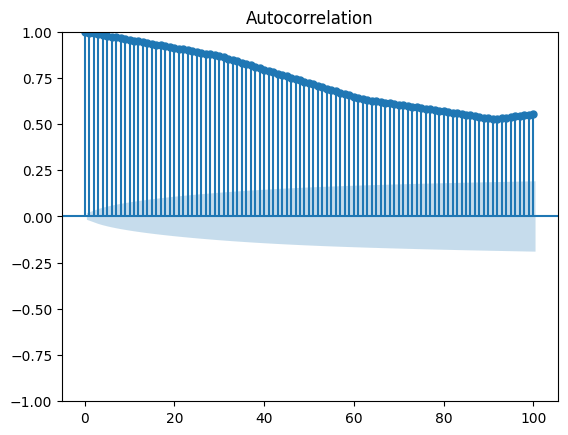

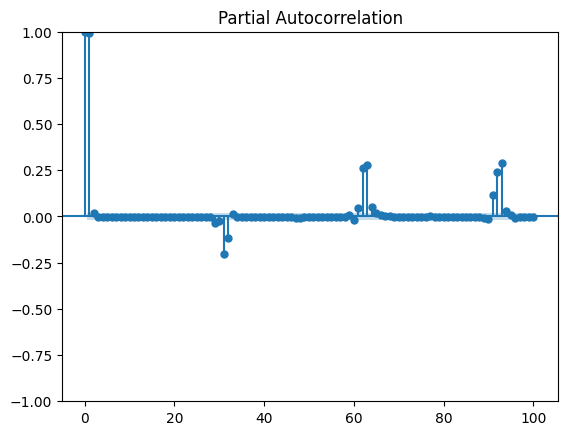

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

fig = sm.graphics.tsa.plot_acf(df['IPG2211A2N'].iloc[13:],lags=100)
fig = sm.graphics.tsa.plot_pacf(df['IPG2211A2N'].iloc[13:],lags=100)


In [ ]:
split_date = '2014-01-01'
split_index = len(df[df['index'] < split_date])

In [ ]:
train_data = df.iloc[:split_index]
test_data = df.iloc[split_index:]

# train_data.reset_index(drop=True, inplace=True)
# test_data.reset_index(drop=True, inplace=True)
train_data

,index,IPG2211A2N
0,1985-01-01,72.5052
1,1985-01-02,72.5052
2,1985-01-03,72.5052
3,1985-01-04,72.5052
4,1985-01-05,72.5052
...,...,...
10587,2013-12-27,113.4732
10588,2013-12-28,113.4732
10589,2013-12-29,113.4732
10590,2013-12-30,113.4732


In [ ]:
test_data

,index,IPG2211A2N
10592,2014-01-01,124.2549
10593,2014-01-02,124.2549
10594,2014-01-03,124.2549
10595,2014-01-04,124.2549
10596,2014-01-05,124.2549
...,...,...
12049,2017-12-28,114.7212
12050,2017-12-29,114.7212
12051,2017-12-30,114.7212
12052,2017-12-31,114.7212


In [ ]:
ipg_series = train_data['IPG2211A2N']

In [ ]:
import statsmodels.api as sm

In [ ]:
import time

# Start measuring time
start_time = time.time()


model = sm.tsa.arima.ARIMA(ipg_series, order=(0, 1, 0))
result = model.fit()

end_time = time.time()

In [ ]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:             IPG2211A2N   No. Observations:                10592
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -18165.580
Date:                Mon, 09 Oct 2023   AIC                          36333.159
Time:                        18:36:57   BIC                          36340.427
Sample:                             0   HQIC                         36335.612
                              - 10592                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         1.8086      0.004    424.523      0.000       1.800       1.817
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           1929197.57
Prob(Q):                              1.00   Pr

In [ ]:
start =  len(train_data)
end = len(train_data)+len(test_data)-1

test_data['arima_forecast']=result.predict(start=start,end=end,type = 'levels',dynamic=True)
test_data

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['type']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
<ipython-input-68-13f68a98a560>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['arima_forecast']=result.predict(start=start,end=end,type = 'levels',dynamic=True)


,index,IPG2211A2N,arima_forecast
10592,2014-01-01,124.2549,113.4732
10593,2014-01-02,124.2549,113.4732
10594,2014-01-03,124.2549,113.4732
10595,2014-01-04,124.2549,113.4732
10596,2014-01-05,124.2549,113.4732
...,...,...,...
12049,2017-12-28,114.7212,113.4732
12050,2017-12-29,114.7212,113.4732
12051,2017-12-30,114.7212,113.4732
12052,2017-12-31,114.7212,113.4732


<Axes: >

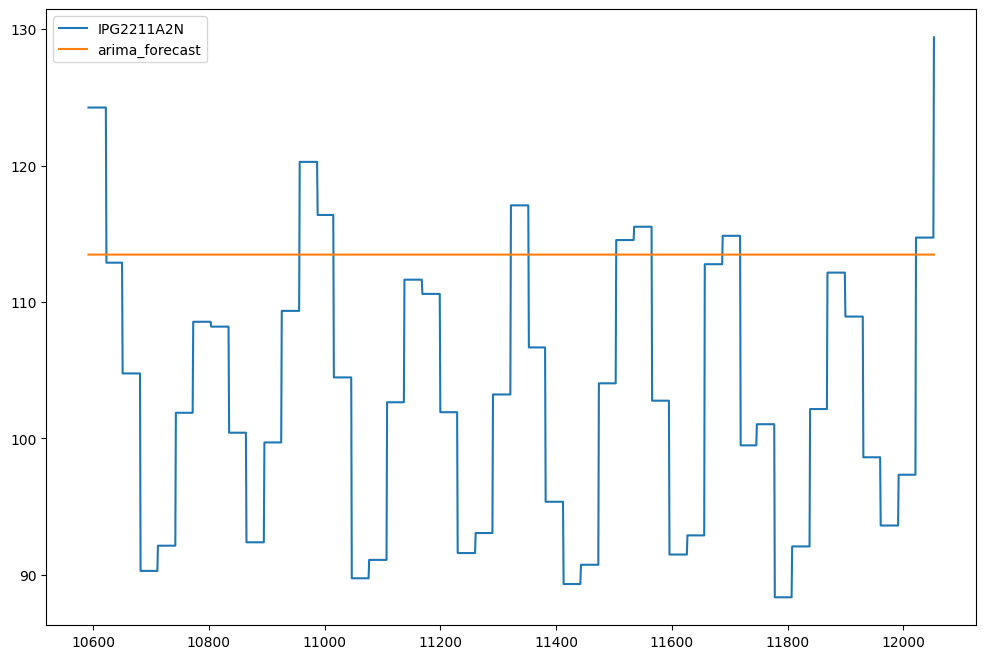

In [ ]:
test_data[['IPG2211A2N','arima_forecast']].plot(figsize=(12,8))

In [ ]:
actual_data = test_data['IPG2211A2N']

forecast_data = test_data['arima_forecast']

In [ ]:
import numpy as np

def smape(actual, forecast):
    return 100 * np.mean(2 * np.abs(forecast - actual) / (np.abs(actual) + np.abs(forecast)))

smape_value = smape(actual_data, forecast_data)

def mape(actual, forecast):
    return 100 * np.mean(np.abs((actual - forecast) / actual))

mape_value = mape(actual_data, forecast_data)

# Mean Absolute Scaled Error (MASE)
def mase(actual, forecast, seasonality):
    mae = np.mean(np.abs(actual - forecast))
    mean_absolute_seasonal_difference = np.mean(np.abs(actual - np.roll(actual, seasonality)))
    return mae / mean_absolute_seasonal_difference

seasonality = 1  # Adjust this based on the seasonality of your data
mase_value = mase(actual_data, forecast_data, seasonality)

# Mean Absolute Error (MAE)
mae_value = np.mean(np.abs(actual_data - forecast_data))

# Root Mean Squared Error (RMSE)
rmse_value = np.sqrt(np.mean((actual_data - forecast_data)**2))

print(f'sMAPE: {smape_value:.2f}')
print(f'MASE: {mase_value:.2f}')
print(f'MAE: {mae_value:.2f}')
print(f'RMSE: {rmse_value:.2f}')
print(f'MAPE: {mape_value:.2f}')

sMAPE: 11.26
MASE: 42.38
MAE: 11.84
RMSE: 14.24
MAPE: 12.27


In [ ]:
runtime = end_time - start_time
print(f"Training runtime: {runtime} seconds")

Training runtime: 0.32273125648498535 seconds


In [ ]:
forecast_data.mean()

113.47319999999999

### Sarima

In [ ]:
import time

start_time = time.time()

model = sm.tsa.statespace.SARIMAX(ipg_series, order=(0,1,0), seasonal_order=(0,1,0,12))
sarima_result = model.fit()

end_time = time.time()

In [ ]:
print(sarima_result.summary())

                                     SARIMAX Results                                      
Dep. Variable:                         IPG2211A2N   No. Observations:                10592
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood              -21817.396
Date:                            Mon, 09 Oct 2023   AIC                          43636.792
Time:                                    18:37:38   BIC                          43644.059
Sample:                                         0   HQIC                         43639.245
                                          - 10592                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         3.6211      0.012    297.638      0.000       3.597       3.645
Ljung-Box (L1) (Q):                

In [ ]:
start =  len(train_data)
end = len(train_data)+len(test_data)-1

test_data['sarima_forecast']=sarima_result.predict(start=start,end=end,type = 'levels',dynamic=True)
test_data

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['type']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
<ipython-input-76-88067b07b5c8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['sarima_forecast']=sarima_result.predict(start=start,end=end,type = 'levels',dynamic=True)


,index,IPG2211A2N,arima_forecast,sarima_forecast
10592,2014-01-01,124.2549,113.4732,113.4732
10593,2014-01-02,124.2549,113.4732,113.4732
10594,2014-01-03,124.2549,113.4732,113.4732
10595,2014-01-04,124.2549,113.4732,113.4732
10596,2014-01-05,124.2549,113.4732,113.4732
...,...,...,...,...
12049,2017-12-28,114.7212,113.4732,113.4732
12050,2017-12-29,114.7212,113.4732,113.4732
12051,2017-12-30,114.7212,113.4732,113.4732
12052,2017-12-31,114.7212,113.4732,113.4732


<Axes: >

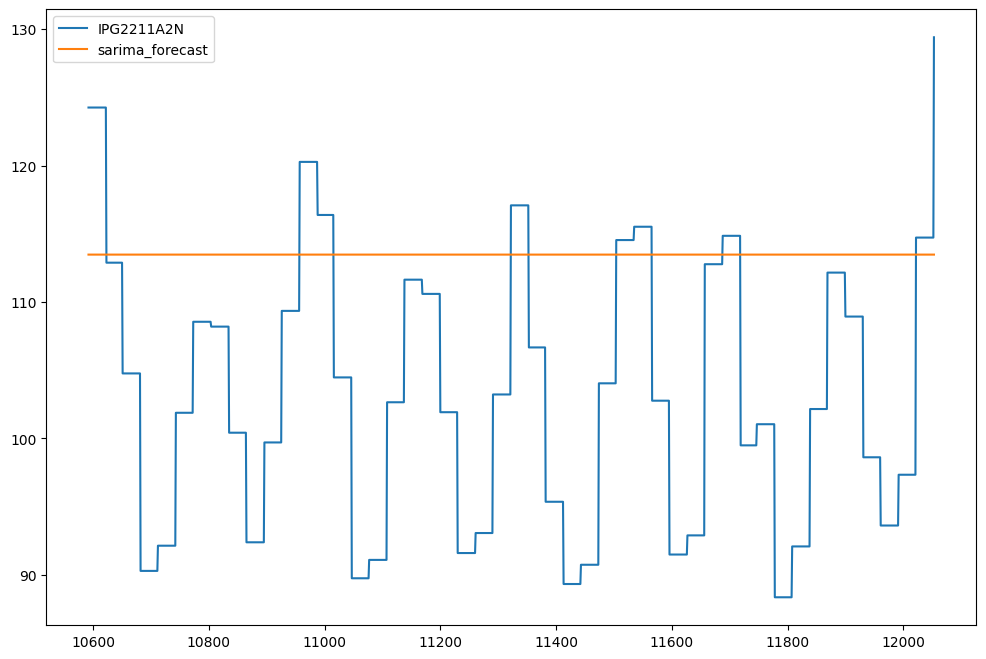

In [ ]:
test_data[['IPG2211A2N','sarima_forecast']].plot(figsize=(12,8))

In [ ]:
actual_data = test_data['IPG2211A2N']

forecast_data = test_data['sarima_forecast']

import numpy as np

def smape(actual, forecast):
    return 100 * np.mean(2 * np.abs(forecast - actual) / (np.abs(actual) + np.abs(forecast)))

smape_value = smape(actual_data, forecast_data)

def mape(actual, forecast):
    return 100 * np.mean(np.abs((actual - forecast) / actual))

mape_value = mape(actual_data, forecast_data)

# Mean Absolute Scaled Error (MASE)
def mase(actual, forecast, seasonality):
    mae = np.mean(np.abs(actual - forecast))
    mean_absolute_seasonal_difference = np.mean(np.abs(actual - np.roll(actual, seasonality)))
    return mae / mean_absolute_seasonal_difference

seasonality = 1  # Adjust this based on the seasonality of your data
mase_value = mase(actual_data, forecast_data, seasonality)

# Mean Absolute Error (MAE)
mae_value = np.mean(np.abs(actual_data - forecast_data))

# Root Mean Squared Error (RMSE)
rmse_value = np.sqrt(np.mean((actual_data - forecast_data)**2))

print(f'sMAPE: {smape_value:.2f}')
print(f'MASE: {mase_value:.2f}')
print(f'MAE: {mae_value:.2f}')
print(f'RMSE: {rmse_value:.2f}')
print(f'MAPE: {mape_value:.2f}')

sMAPE: 11.26
MASE: 42.38
MAE: 11.84
RMSE: 14.24
MAPE: 12.27


In [ ]:
runtime = end_time - start_time
print(f"Training runtime: {runtime} seconds")

Training runtime: 0.8089141845703125 seconds


### ETS


In [ ]:
import time
start_time = time.time()

ets_model = sm.tsa.ExponentialSmoothing(ipg_series, trend='add', seasonal='add', seasonal_periods=12)

# Fit the model
ets_result = ets_model.fit()

end_time = time.time()

# Get the model summary
print(ets_result.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:               IPG2211A2N   No. Observations:                10592
Model:             ExponentialSmoothing   SSE                          19133.067
Optimized:                         True   AIC                           6295.252
Trend:                         Additive   BIC                           6411.538
Seasonal:                      Additive   AICC                          6295.317
Seasonal Periods:                    12   Date:                 Mon, 09 Oct 2023
Box-Cox:                          False   Time:                         18:38:29
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               1.0000000                alpha                 True
smoothing_trend          

In [ ]:
start =  len(train_data)
end = len(train_data)+len(test_data)-1

test_data['ets_forecast']=ets_result.predict(start=start,end=end)
test_data

<ipython-input-81-dcd9299dc47f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['ets_forecast']=ets_result.predict(start=start,end=end)


,index,IPG2211A2N,arima_forecast,sarima_forecast,ets_forecast
10592,2014-01-01,124.2549,113.4732,113.4732,113.525373
10593,2014-01-02,124.2549,113.4732,113.4732,113.511378
10594,2014-01-03,124.2549,113.4732,113.4732,113.456193
10595,2014-01-04,124.2549,113.4732,113.4732,113.534981
10596,2014-01-05,124.2549,113.4732,113.4732,113.529954
...,...,...,...,...,...
12049,2017-12-28,114.7212,113.4732,113.4732,118.951840
12050,2017-12-29,114.7212,113.4732,113.4732,119.007399
12051,2017-12-30,114.7212,113.4732,113.4732,119.022715
12052,2017-12-31,114.7212,113.4732,113.4732,118.992037


<Axes: >

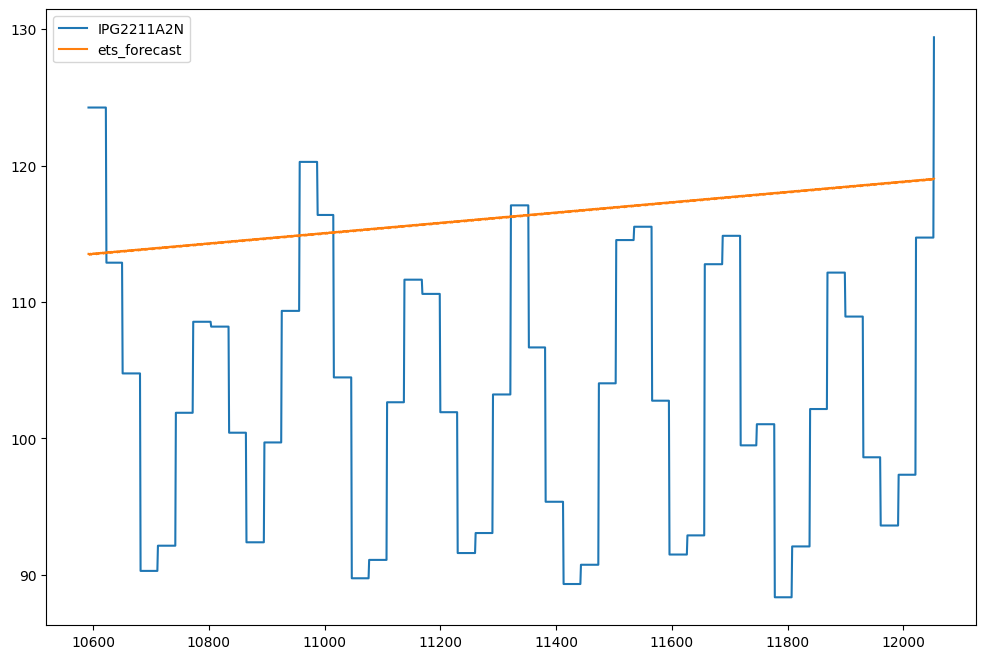

In [ ]:
test_data[['IPG2211A2N','ets_forecast']].plot(figsize=(12,8))

In [ ]:
actual_data = test_data['IPG2211A2N']

forecast_data = test_data['ets_forecast']

import numpy as np

def smape(actual, forecast):
    return 100 * np.mean(2 * np.abs(forecast - actual) / (np.abs(actual) + np.abs(forecast)))

smape_value = smape(actual_data, forecast_data)

def mape(actual, forecast):
    return 100 * np.mean(np.abs((actual - forecast) / actual))

mape_value = mape(actual_data, forecast_data)

# Mean Absolute Scaled Error (MASE)
def mase(actual, forecast, seasonality):
    mae = np.mean(np.abs(actual - forecast))
    mean_absolute_seasonal_difference = np.mean(np.abs(actual - np.roll(actual, seasonality)))
    return mae / mean_absolute_seasonal_difference

seasonality = 1  # Adjust this based on the seasonality of your data
mase_value = mase(actual_data, forecast_data, seasonality)

# Mean Absolute Error (MAE)
mae_value = np.mean(np.abs(actual_data - forecast_data))

# Root Mean Squared Error (RMSE)
rmse_value = np.sqrt(np.mean((actual_data - forecast_data)**2))

print(f'sMAPE: {smape_value:.2f}')
print(f'MASE: {mase_value:.2f}')
print(f'MAE: {mae_value:.2f}')
print(f'RMSE: {rmse_value:.2f}')
print(f'MAPE: {mape_value:.2f}')

sMAPE: 13.23
MASE: 50.57
MAE: 14.13
RMSE: 16.58
MAPE: 14.59


In [ ]:
runtime = end_time - start_time
print(f"Training runtime: {runtime} seconds")

Training runtime: 4.785600423812866 seconds


### Theta

In [ ]:
train_data

,index,IPG2211A2N
0,1985-01-01,72.5052
1,1985-01-02,72.5052
2,1985-01-03,72.5052
3,1985-01-04,72.5052
4,1985-01-05,72.5052
...,...,...
10587,2013-12-27,113.4732
10588,2013-12-28,113.4732
10589,2013-12-29,113.4732
10590,2013-12-30,113.4732


In [ ]:
test_data

,index,IPG2211A2N,arima_forecast,sarima_forecast,ets_forecast
10592,2014-01-01,124.2549,113.4732,113.4732,113.525373
10593,2014-01-02,124.2549,113.4732,113.4732,113.511378
10594,2014-01-03,124.2549,113.4732,113.4732,113.456193
10595,2014-01-04,124.2549,113.4732,113.4732,113.534981
10596,2014-01-05,124.2549,113.4732,113.4732,113.529954
...,...,...,...,...,...
12049,2017-12-28,114.7212,113.4732,113.4732,118.951840
12050,2017-12-29,114.7212,113.4732,113.4732,119.007399
12051,2017-12-30,114.7212,113.4732,113.4732,119.022715
12052,2017-12-31,114.7212,113.4732,113.4732,118.992037


In [ ]:
# Set the "DATE" column as the index
train_data.set_index('index', inplace=True)


In [ ]:
from statsmodels.tsa.forecasting.theta import ThetaModel

In [ ]:
start_time = time.time()


tm = ThetaModel(train_data['IPG2211A2N'])
res = tm.fit()

end_time = time.time()
print(res.summary())
# /
# # Create a Theta model
# theta_model = Theta()

# # Fit the model to the training data
# theta_model.fit(train_data['IPG2211A2N'])


                              ThetaModel Results                              
Dep. Variable:             IPG2211A2N   No. Observations:                10592
Method:                       OLS/SES   Deseasonalized:                   True
Date:                Mon, 09 Oct 2023   Deseas. Method:         Multiplicative
Time:                        18:32:34   Period:                              7
Sample:                    01-01-1985                                         
                         - 12-31-2013                                         
   Parameter Estimates    
           Parameters     
--------------------------
b0    0.004130121948235623
alpha   0.9969094627420234
--------------------------


In [ ]:
forecast_values = res.forecast(steps=len(test_data)+1)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/forecasting/theta.py:44: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  return DeterministicTerm._extend_index(index, steps)


In [ ]:
forecast_df = pd.DataFrame({'Forecast': forecast_values}, index=test_data.index)
forecast_df['Forecast']

10593    113.512295
10594    113.493121
10595    113.482865
10596    113.470612
10597    113.466531
            ...    
12049    116.519970
12050    116.500234
12051    116.489651
12052    116.477018
12053    116.472775
Name: Forecast, Length: 1461, dtype: float64

In [ ]:
# # Assuming you have the DataFrame forecast_df as mentioned
# index_to_remove = 10592
# forecast_df = forecast_df.drop(index_to_remove)
# print(forecast_df)


In [ ]:
index_to_remove = 10592
test_data = test_data.drop(index_to_remove)
print(test_data['IPG2211A2N'])

10593    124.2549
10594    124.2549
10595    124.2549
10596    124.2549
10597    124.2549
           ...   
12049    114.7212
12050    114.7212
12051    114.7212
12052    114.7212
12053    129.4048
Name: IPG2211A2N, Length: 1461, dtype: float64


In [ ]:
test_data['IPG2211A2N']

10593    124.2549
10594    124.2549
10595    124.2549
10596    124.2549
10597    124.2549
           ...   
12049    114.7212
12050    114.7212
12051    114.7212
12052    114.7212
12053    129.4048
Name: IPG2211A2N, Length: 1461, dtype: float64

In [ ]:
actual_data = test_data['IPG2211A2N']

forecast_data = forecast_df['Forecast']

import numpy as np

def smape(actual, forecast):
    return 100 * np.mean(2 * np.abs(forecast - actual) / (np.abs(actual) + np.abs(forecast)))

smape_value = smape(actual_data, forecast_data)

def mape(actual, forecast):
    return 100 * np.mean(np.abs((actual - forecast) / actual))

mape_value = mape(actual_data, forecast_data)

# Mean Absolute Scaled Error (MASE)
def mase(actual, forecast, seasonality):
    mae = np.mean(np.abs(actual - forecast))
    mean_absolute_seasonal_difference = np.mean(np.abs(actual - np.roll(actual, seasonality)))
    return mae / mean_absolute_seasonal_difference

seasonality = 1  # Adjust this based on the seasonality of your data
mase_value = mase(actual_data, forecast_data, seasonality)

# Mean Absolute Error (MAE)
mae_value = np.mean(np.abs(actual_data - forecast_data))

# Root Mean Squared Error (RMSE)
rmse_value = np.sqrt(np.mean((actual_data - forecast_data)**2))

print(f'sMAPE: {smape_value:.2f}')
print(f'MASE: {mase_value:.2f}')
print(f'MAE: {mae_value:.2f}')
print(f'RMSE: {rmse_value:.2f}')
print(f'MAPE: {mape_value:.2f}')

sMAPE: 12.25
MASE: 46.41
MAE: 12.97
RMSE: 15.48
MAPE: 13.44


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/forecasting/theta.py:44: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  return DeterministicTerm._extend_index(index, steps)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/forecasting/theta.py:44: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  return DeterministicTerm._extend_index(index, steps)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/forecasting/theta.py:44: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  return Determinist

Text(0.5, 1.0, 'Forecasts of IPG2211A2N')

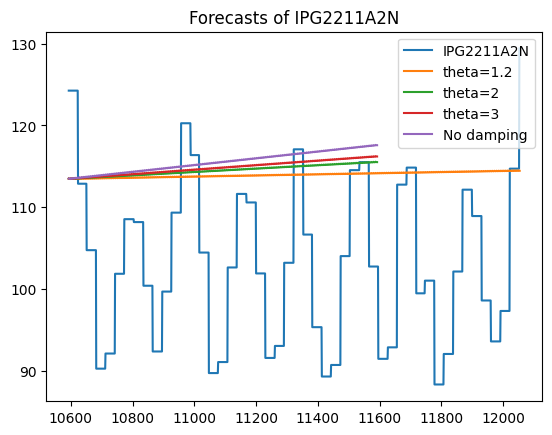

In [ ]:
import numpy as np

forecasts = pd.DataFrame(
    {
        "IPG2211A2N": test_data['IPG2211A2N'],
        "theta=1.2": res.forecast(1462, theta=1.2),
        "theta=2": res.forecast(1000),
        "theta=3": res.forecast(1000, theta=3),
        "No damping": res.forecast(1000, theta=np.inf),
    }
)
_ = forecasts.tail(2000).plot()
plt.title("Forecasts of IPG2211A2N")
# plt.tight_layout(pad=1.0)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/forecasting/theta.py:44: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  return DeterministicTerm._extend_index(index, steps)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/forecasting/theta.py:44: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  return DeterministicTerm._extend_index(index, steps)


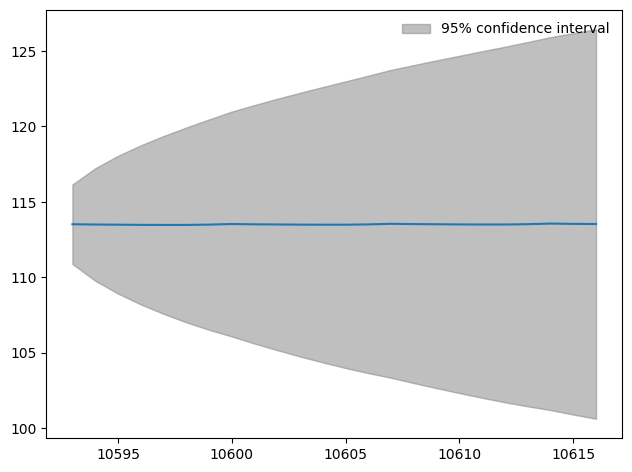

In [ ]:
ax = res.plot_predict(24, theta=2)


In [ ]:
runtime = end_time - start_time
print(f"Training runtime: {runtime} seconds")

Training runtime: 4.785600423812866 seconds


## Croston

In [ ]:
test_data

,index,IPG2211A2N,arima_forecast,sarima_forecast,ets_forecast
10593,2014-01-02,124.2549,113.4732,113.4732,113.511378
10594,2014-01-03,124.2549,113.4732,113.4732,113.456193
10595,2014-01-04,124.2549,113.4732,113.4732,113.534981
10596,2014-01-05,124.2549,113.4732,113.4732,113.529954
10597,2014-01-06,124.2549,113.4732,113.4732,113.469725
...,...,...,...,...,...
12049,2017-12-28,114.7212,113.4732,113.4732,118.951840
12050,2017-12-29,114.7212,113.4732,113.4732,119.007399
12051,2017-12-30,114.7212,113.4732,113.4732,119.022715
12052,2017-12-31,114.7212,113.4732,113.4732,118.992037


In [ ]:
train_data

,index,IPG2211A2N
0,1985-01-01,72.5052
1,1985-01-02,72.5052
2,1985-01-03,72.5052
3,1985-01-04,72.5052
4,1985-01-05,72.5052
...,...,...
10587,2013-12-27,113.4732
10588,2013-12-28,113.4732
10589,2013-12-29,113.4732
10590,2013-12-30,113.4732


In [ ]:
!pip install u8darts


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 785.0/785.0 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.9/110.9 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.0/275.0 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.2/169.2 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 16.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.9/315.9 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.2/144.2 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from darts import TimeSeries
from darts.models import Croston
from darts.metrics import mape

In [ ]:
df

,IPG2211A2N
index,
1985-01-01,72.5052
1985-01-02,72.5052
1985-01-03,72.5052
1985-01-04,72.5052
1985-01-05,72.5052
...,...
2017-12-28,114.7212
2017-12-29,114.7212
2017-12-30,114.7212


In [ ]:
# df['index'] = pd.to_datetime(df['index'])
# df.set_index('index', inplace=True)
series = TimeSeries.from_dataframe(df, value_cols='IPG2211A2N')


In [ ]:
# Split the data into training and validation sets
train_size = 10592
train_series, test_series = series[:train_size], series[train_size:]


In [ ]:
import time

# Start measuring time
start_time = time.time()
# Create a Croston object
croston_model = Croston(version="optimized")

croston_model.fit(train_series)

end_time = time.time()

In [ ]:
croston_model.predict(len(test_series), future_covariates=None).values()

array([[113.472946],
       [113.472946],
       [113.472946],
       ...,
       [113.472946],
       [113.472946],
       [113.472946]], dtype=float32)

In [ ]:
forecast_period = 1461  # Adjust as needed

test_data['croston_forecast']= croston_model.predict(len(test_series)-1).values()
test_data

,index,IPG2211A2N,arima_forecast,sarima_forecast,ets_forecast,croston_forecast
10593,2014-01-02,124.2549,113.4732,113.4732,113.511378,113.472946
10594,2014-01-03,124.2549,113.4732,113.4732,113.456193,113.472946
10595,2014-01-04,124.2549,113.4732,113.4732,113.534981,113.472946
10596,2014-01-05,124.2549,113.4732,113.4732,113.529954,113.472946
10597,2014-01-06,124.2549,113.4732,113.4732,113.469725,113.472946
...,...,...,...,...,...,...
12049,2017-12-28,114.7212,113.4732,113.4732,118.951840,113.472946
12050,2017-12-29,114.7212,113.4732,113.4732,119.007399,113.472946
12051,2017-12-30,114.7212,113.4732,113.4732,119.022715,113.472946
12052,2017-12-31,114.7212,113.4732,113.4732,118.992037,113.472946


<Axes: >

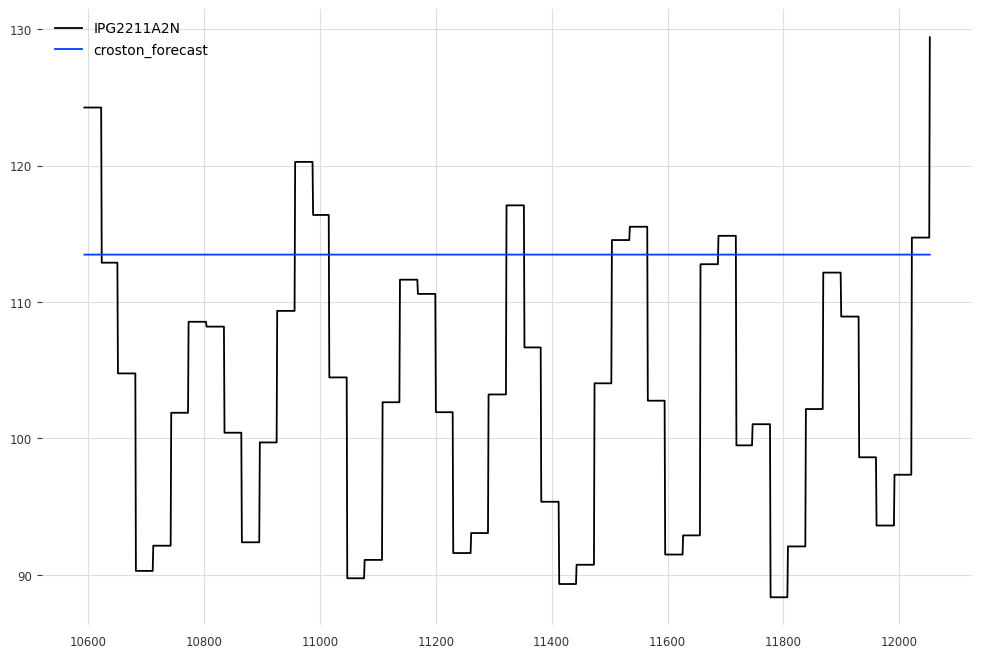

In [ ]:
test_data[['IPG2211A2N','croston_forecast']].plot(figsize=(12,8))

In [ ]:
# Calculate and print the runtime
runtime = end_time - start_time
print(f"Training runtime: {runtime} seconds")


Training runtime: 0.017284870147705078 seconds


In [ ]:
actual_data = test_data['IPG2211A2N']

forecast_data = test_data['croston_forecast']

import numpy as np

def smape(actual, forecast):
    return 100 * np.mean(2 * np.abs(forecast - actual) / (np.abs(actual) + np.abs(forecast)))

smape_value = smape(actual_data, forecast_data)

def mape(actual, forecast):
    return 100 * np.mean(np.abs((actual - forecast) / actual))

mape_value = mape(actual_data, forecast_data)

# Mean Absolute Scaled Error (MASE)
def mase(actual, forecast, seasonality):
    mae = np.mean(np.abs(actual - forecast))
    mean_absolute_seasonal_difference = np.mean(np.abs(actual - np.roll(actual, seasonality)))
    return mae / mean_absolute_seasonal_difference

seasonality = 1  # Adjust this based on the seasonality of your data
mase_value = mase(actual_data, forecast_data, seasonality)

# Mean Absolute Error (MAE)
mae_value = np.mean(np.abs(actual_data - forecast_data))

# Root Mean Squared Error (RMSE)
rmse_value = np.sqrt(np.mean((actual_data - forecast_data)**2))

print(f'sMAPE: {smape_value:.2f}')
print(f'MASE: {mase_value:.2f}')
print(f'MAE: {mae_value:.2f}')
print(f'RMSE: {rmse_value:.2f}')
print(f'MAPE: {mape_value:.2f}')

sMAPE: 11.26
MASE: 42.36
MAE: 11.84
RMSE: 14.24
MAPE: 12.28
